<a href="https://colab.research.google.com/github/SangamSilwal/Machine-learning-Series/blob/main/class_9_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/placement.csv")

In [3]:
df.sample(3)

cgpa  placement_exam_marks  placed
175  7.57                  26.0       1
727  7.00                  30.0       0
128  6.76                  25.0       0

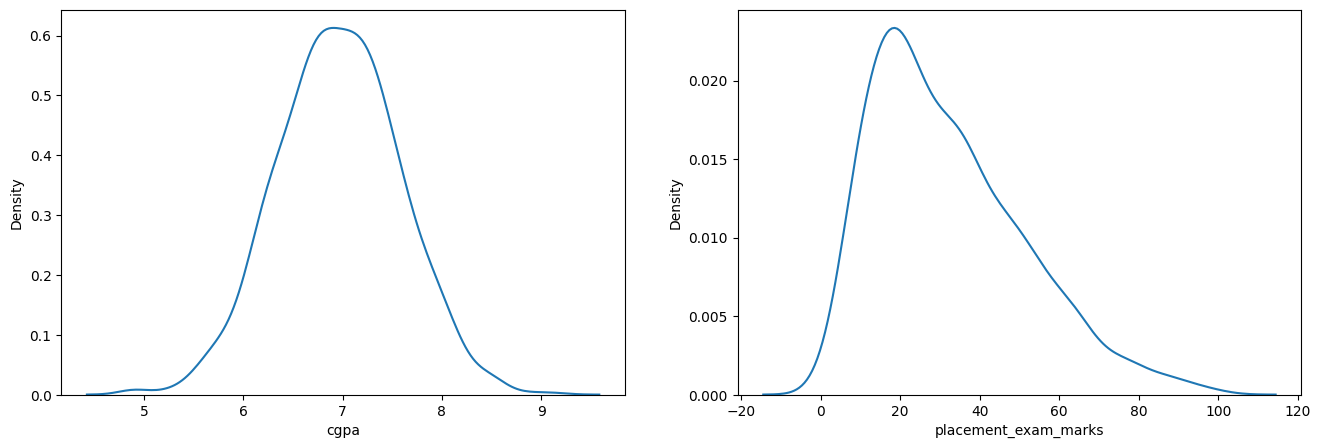

In [9]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(df['cgpa'])

plt.subplot(1,2,2)
sns.kdeplot(df['placement_exam_marks'])

plt.show()

We can see that CGPA is normally distributed But the placement_exam_marks is not normally distributed so we can apply the Z-score method in the cgpa column

In [10]:
print("Mean value of CGPA",df['cgpa'].mean())
print("Std value of CGPA",df['cgpa'].std())
print("Min value of CGPA",df['cgpa'].min())
print("Max value of CGPA",df['cgpa'].max())

Mean value of CGPA 6.96124
Std value of CGPA 0.6158978751323894
Min value of CGPA 4.89
Max value of CGPA 9.12


In [11]:
#finding the boundry values
print("Highest Allowed: ",df['cgpa'].mean()+3*df['cgpa'].std())
print("Lowest Allowed: ",df['cgpa'].mean()-3*df['cgpa'].std())

Highest Allowed:  8.808933625397168
Lowest Allowed:  5.113546374602832


In [12]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

cgpa  placement_exam_marks  placed
485  4.92                  44.0       1
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
999  4.90                  10.0       1

# Trimming

In [14]:
#Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
991  7.04                  57.0       0
992  6.26                  12.0       0
993  6.73                  21.0       1
994  6.48                  63.0       0
998  8.62                  46.0       1

[995 rows x 3 columns]

In [15]:
# Approach 2

# Calculating the Z-Score
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [16]:
df.head()

cgpa  placement_exam_marks  placed  cgpa_zscore
0  7.19                  26.0       1     0.371425
1  7.46                  38.0       1     0.809810
2  7.54                  40.0       1     0.939701
3  6.42                   8.0       1    -0.878782
4  7.23                  17.0       0     0.436371

In [17]:
df[df['cgpa_zscore'] > 3]

cgpa  placement_exam_marks  placed  cgpa_zscore
995  8.87                  44.0       1     3.099150
996  9.12                  65.0       1     3.505062

In [18]:
df[df['cgpa_zscore'] < -3]

cgpa  placement_exam_marks  placed  cgpa_zscore
485  4.92                  44.0       1    -3.314251
997  4.89                  34.0       0    -3.362960
999  4.90                  10.0       1    -3.346724

In [19]:
# Trimming
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]
new_df

cgpa  placement_exam_marks  placed  cgpa_zscore
0    7.19                  26.0       1     0.371425
1    7.46                  38.0       1     0.809810
2    7.54                  40.0       1     0.939701
3    6.42                   8.0       1    -0.878782
4    7.23                  17.0       0     0.436371
..    ...                   ...     ...          ...
991  7.04                  57.0       0     0.127878
992  6.26                  12.0       0    -1.138565
993  6.73                  21.0       1    -0.375452
994  6.48                  63.0       0    -0.781363
998  8.62                  46.0       1     2.693239

[995 rows x 4 columns]

# Capping

In [20]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [21]:
df['cgpa'] = np.where(
    df['cgpa'] > upper_limit,
    upper_limit,
    np.where(
        df['cgpa'] < lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [23]:
df.shape

(1000, 4)